In [1]:
import numpy as np

In [2]:
n=1000

In [3]:
X = np.random.random_integers(0,1,(n,2))

C:\Users\dell\AppData\Local\Temp\ipykernel_4976\2656271035.py:1: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  X = np.random.random_integers(0,1,(n,2))


In [4]:
X

array([[1, 0],
       [1, 1],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 0]], shape=(1000, 2), dtype=int32)

In [5]:
import logical_operator

In [6]:
dir(logical_operator)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'a_',
 'a_w_b_',
 'and_',
 'b_',
 'b_w_a_',
 'false_',
 'na_',
 'na_w_b_',
 'nand_',
 'nb_',
 'nor_',
 'not_',
 'np',
 'nxor_',
 'or_',
 'true_',
 'xor_']

In [7]:
Y = logical_operator.and_(X[:,0], X[:,1])

In [8]:
Y

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,

In [9]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

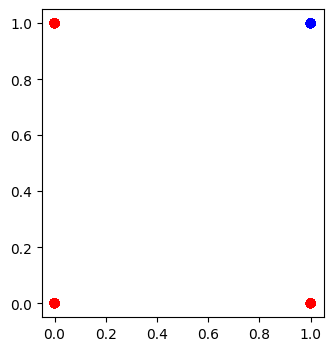

In [10]:
plt.figure(figsize=(8, 4))
ax = plt.subplot(1, 1 + 1, 1)
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=cm_bright, alpha=0.6)

In [11]:
class Perceptron2:
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float64(0.)
        
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)

In [12]:
clf = Perceptron2()

In [13]:
from sklearn.linear_model import Perceptron

In [14]:
clf = Perceptron()

In [15]:
clf = clf.fit(X,Y)

In [16]:
h=0.1
x_min, x_max = X[:, 0].min() - 1.5, X[:, 0].max() + 1.5
y_min, y_max = X[:, 1].min() - 1.5, X[:, 1].max() + 1.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [17]:
X_ = np.random.random((n,2))

In [18]:
X_

array([[0.59384681, 0.01895646],
       [0.71569799, 0.7524943 ],
       [0.14588246, 0.64861135],
       ...,
       [0.39407618, 0.67340323],
       [0.5959894 , 0.47044027],
       [0.74054246, 0.24901567]], shape=(1000, 2))

In [19]:
prediction = clf.predict(np.column_stack([xx.ravel(), yy.ravel()]))

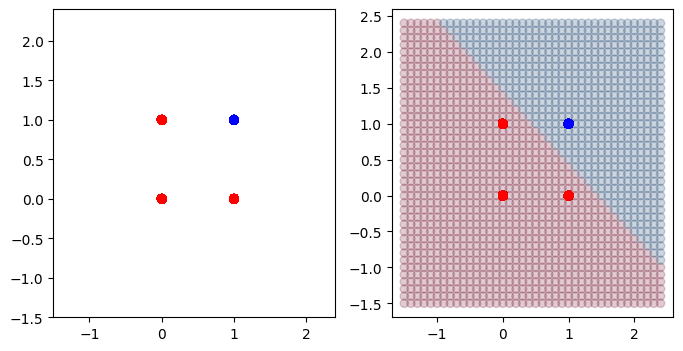

In [20]:
plt.figure(figsize=(8, 4))
ax = plt.subplot(1, 1 + 1, 1)
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=cm_bright, alpha=0.6)

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax = plt.subplot(1, 2, 2)
cm = plt.cm.RdBu
ax.scatter(xx, yy, c=prediction.reshape(xx.shape), cmap=cm, alpha=0.2)
ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=cm_bright, alpha=0.6)

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

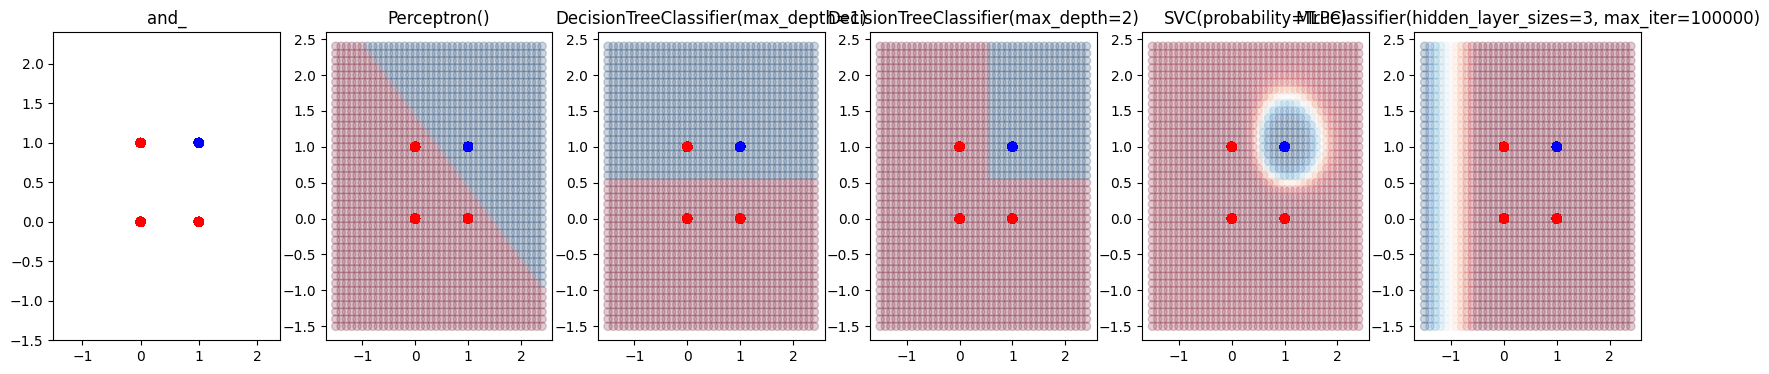

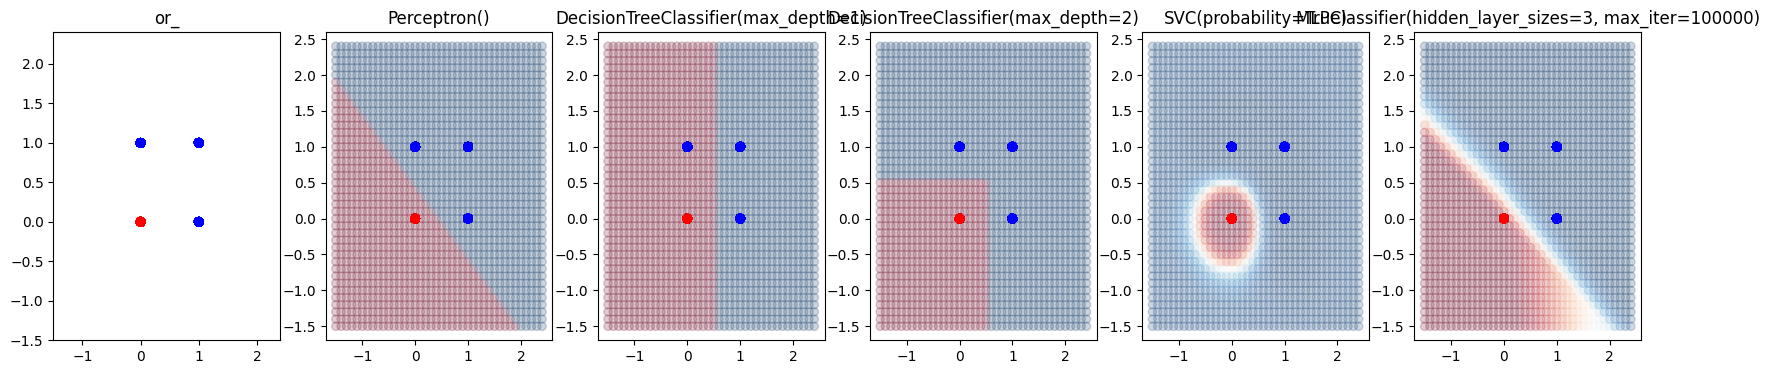

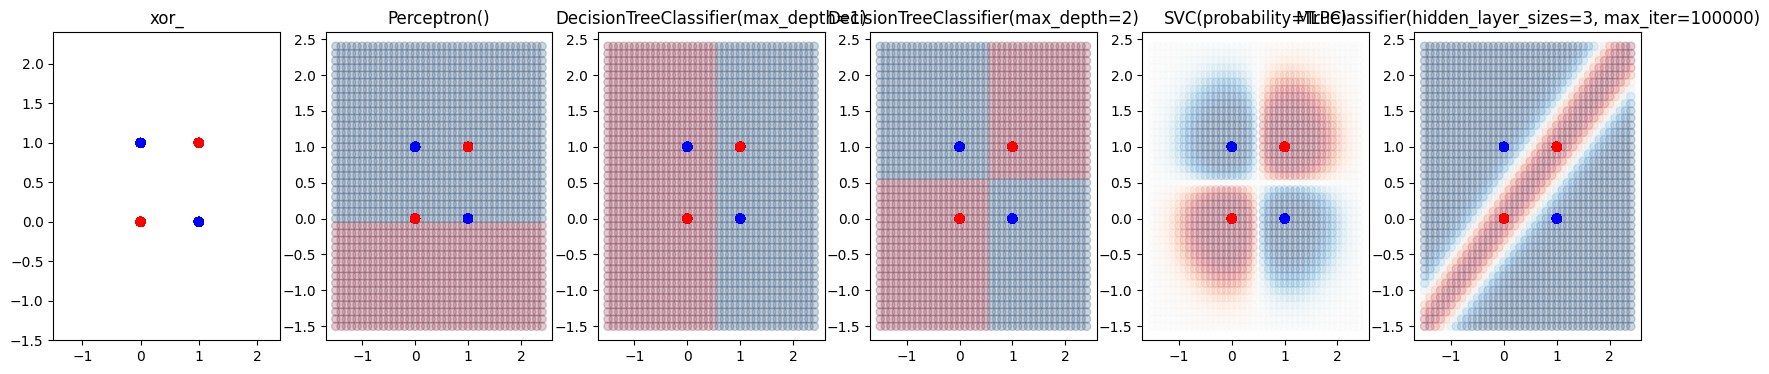

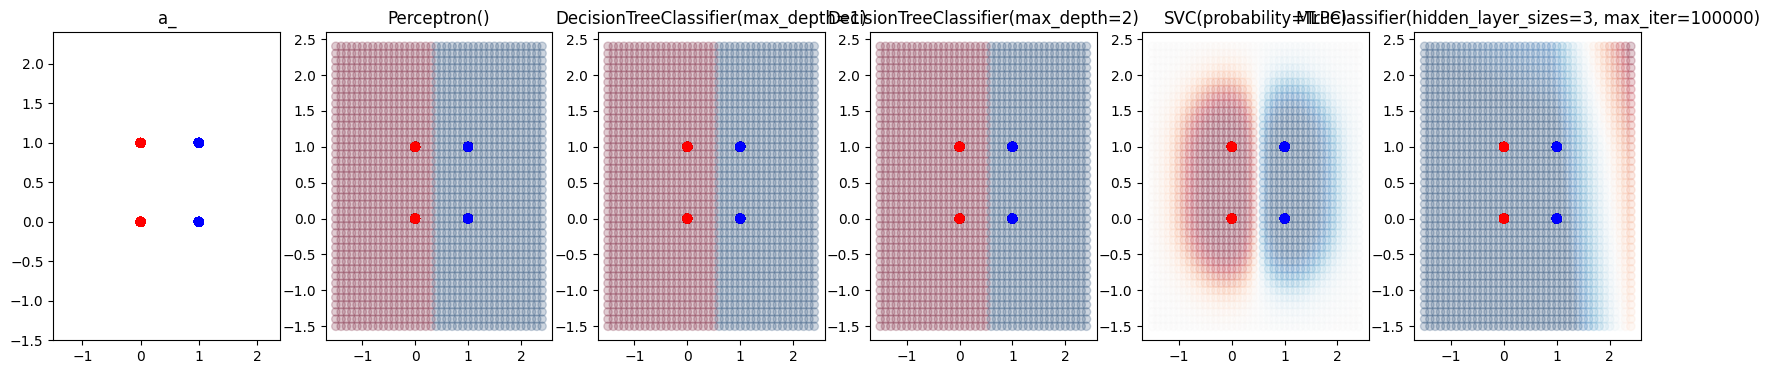

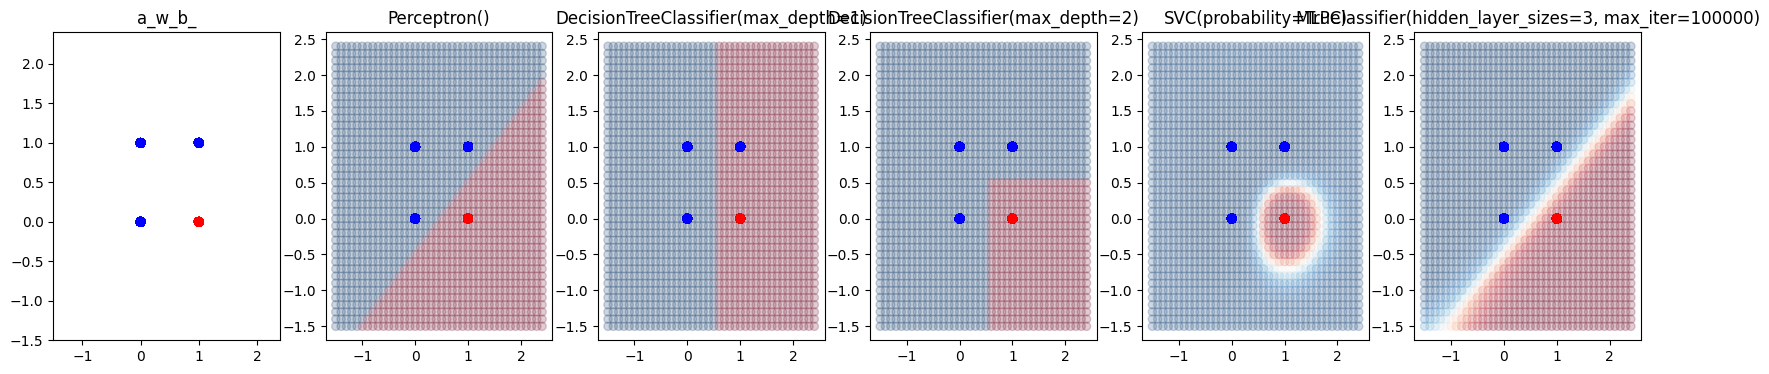

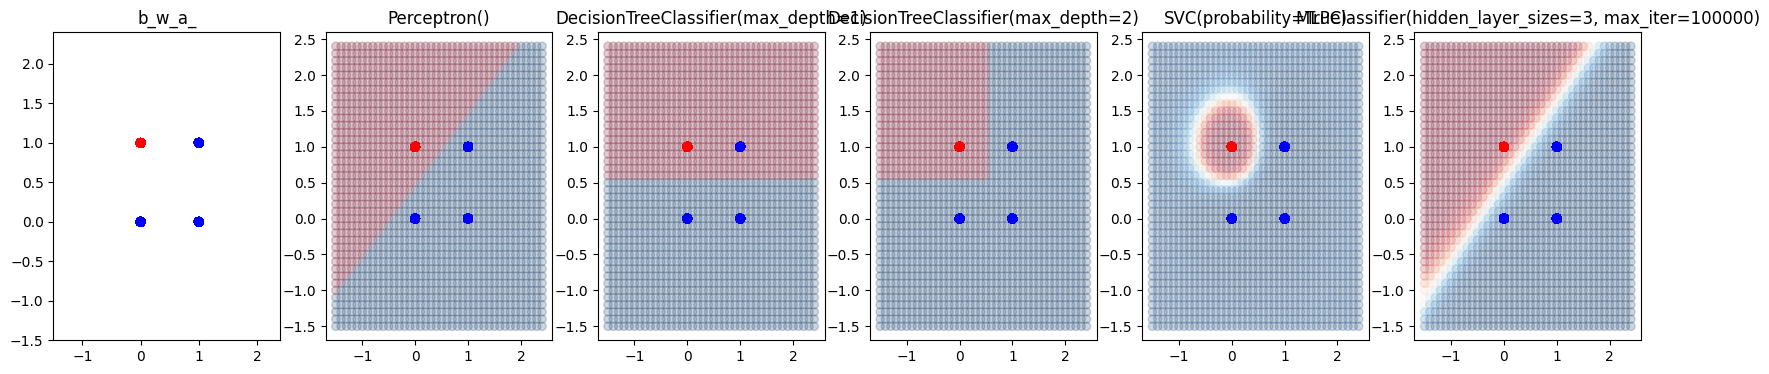

In [35]:
for function_ in [logical_operator.and_, logical_operator.or_,
                  logical_operator.xor_, logical_operator.a_,
                 logical_operator.a_w_b_, logical_operator.b_w_a_]:
    Y = function_(X[:,0], X[:,1])
    plt.figure(figsize=(6*4, 4))
    ax = plt.subplot(1, 6 + 1, 1)
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(function_.__name__)
    i=2
    for clf in [Perceptron(), DecisionTreeClassifier(max_depth=1), 
                DecisionTreeClassifier(max_depth=2), 
                SVC(kernel="rbf",probability=True), MLPClassifier((3),max_iter=100000) ]:
        clf.fit(X, Y)
        try:
            prediction = clf.predict_proba(np.column_stack([xx.ravel(), yy.ravel()]))[:,1]
        except:
            prediction = clf.predict(np.column_stack([xx.ravel(), yy.ravel()]))
        ax = plt.subplot(1,7,i)
        cm = plt.cm.RdBu
        ax.scatter(xx, yy, c=prediction.reshape(xx.shape), cmap=cm, alpha=0.2)
        ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=cm_bright, alpha=0.6)
        ax.set_title(clf)
        i+=1
    plt.show()

[0. 0. 0. ... 1. 1. 1.]
[0. 0. 0. ... 1. 1. 1.]


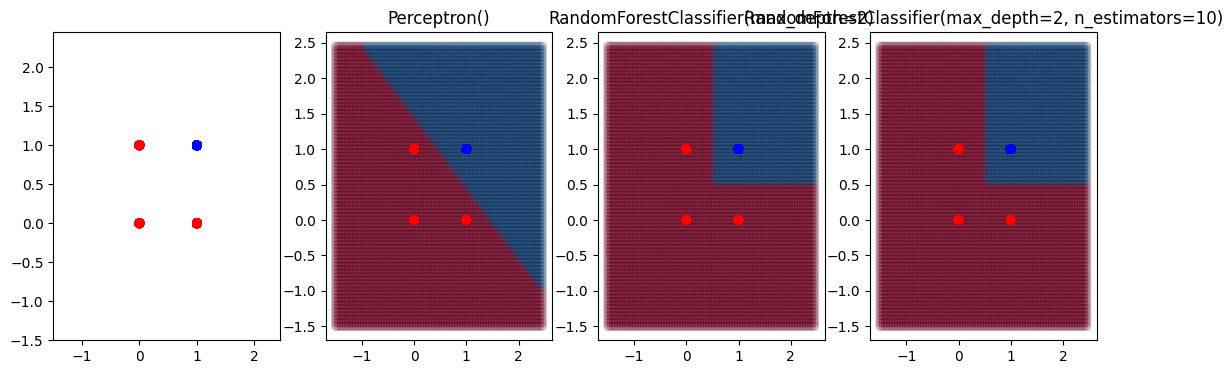

[0. 0. 0. ... 1. 1. 1.]
[0. 0. 0. ... 1. 1. 1.]


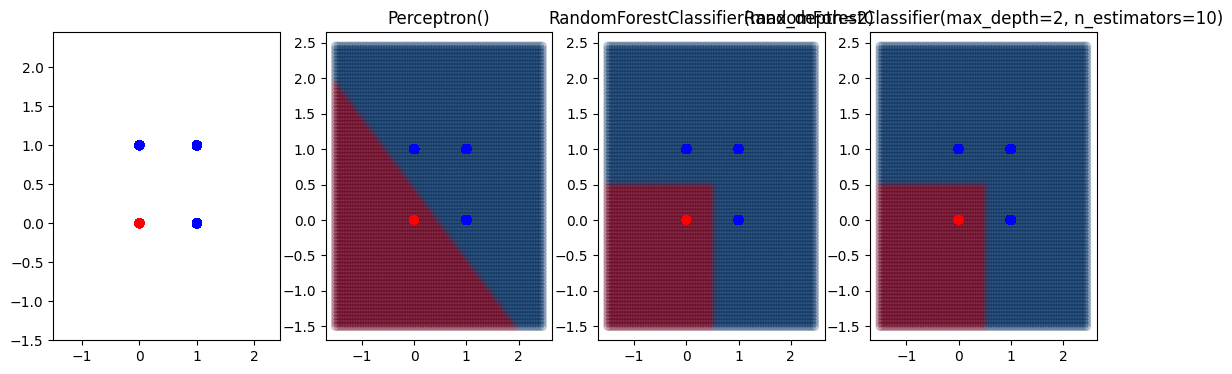

[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]


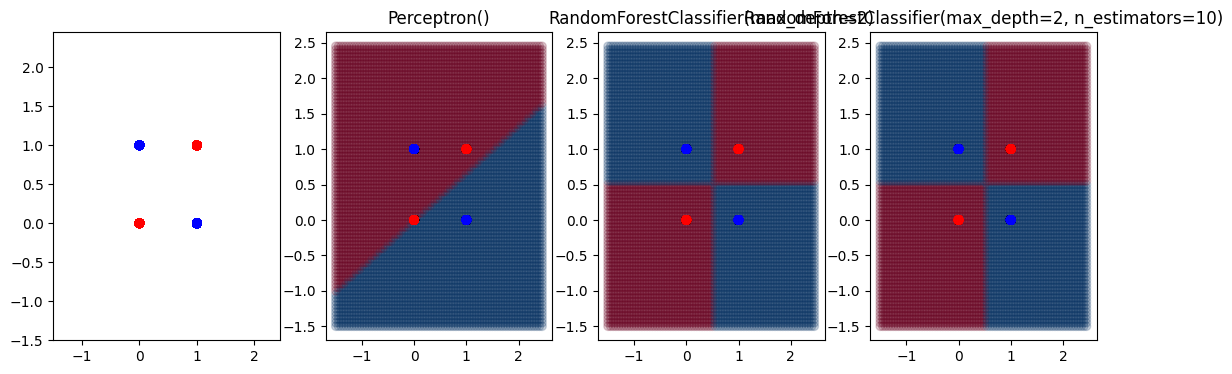

In [69]:
for function_ in [logical_operator.and_, logical_operator.or_,
                  logical_operator.xor_]:
    Y = function_(X[:,0], X[:,1])
    plt.figure(figsize=(6*4, 4))
    ax = plt.subplot(1, 6 + 1, 1)
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    i=2
    for clf in [Perceptron(),  RandomForestClassifier(max_depth=2,n_estimators=100), RandomForestClassifier(max_depth=2,n_estimators=10)]:
        clf.fit(X, Y)
        try:
            prediction = clf.predict_proba(np.column_stack([xx.ravel(), yy.ravel()]))[:,1]
            print(prediction)
        except:
            prediction = clf.predict(np.column_stack([xx.ravel(), yy.ravel()]))
        ax = plt.subplot(1,7,i)
        cm = plt.cm.RdBu
        ax.scatter(xx, yy, c=prediction.reshape(xx.shape), cmap=cm, alpha=0.2)
        ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=cm_bright, alpha=0.6)
        ax.set_title(clf)
        i+=1
    plt.show()

In [70]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

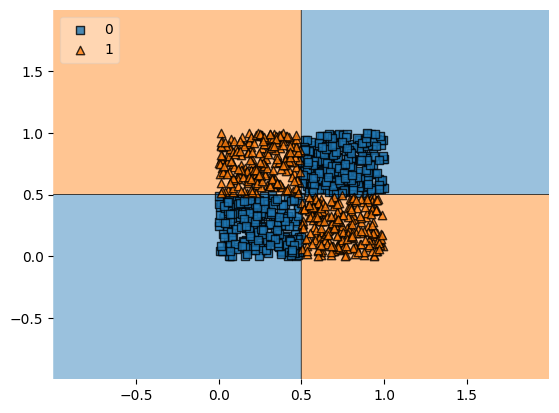

In [71]:
plot_decision_regions(X_, clf.predict(X_), clf=clf, legend=2)